Data Preparation:
- load all the data from JH
- select few countries and plot the number of cases
- creating relational data model
- instead of setting index=[state,country], did group by country
- its avoids averaging the values of each state for the particular country
- verifying the results



In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows',500) 


In [3]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [4]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [5]:
time_idx=pd_raw.columns[4:]

In [6]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [8]:
x=pd_raw[pd_raw['Country/Region']=='Germany']

In [9]:
x.iloc[:,4:]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
130,0,0,0,0,0,1,4,4,4,5,...,244802,246015,247411,248840,250283,251058,251728,253626,254957,256433


In [10]:
pd_raw[pd_raw['Country/Region']=='Nepal'].iloc[:,4::].sum(axis=0)
# pd_raw[pd_raw['Country/Region']=='India'].iloc[:,4::].sum(axis=0)


1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        1
1/26/20        1
1/27/20        1
1/28/20        1
1/29/20        1
1/30/20        1
1/31/20        1
2/1/20         1
2/2/20         1
2/3/20         1
2/4/20         1
2/5/20         1
2/6/20         1
2/7/20         1
2/8/20         1
2/9/20         1
2/10/20        1
2/11/20        1
2/12/20        1
2/13/20        1
2/14/20        1
2/15/20        1
2/16/20        1
2/17/20        1
2/18/20        1
2/19/20        1
2/20/20        1
2/21/20        1
2/22/20        1
2/23/20        1
2/24/20        1
2/25/20        1
2/26/20        1
2/27/20        1
2/28/20        1
2/29/20        1
3/1/20         1
3/2/20         1
3/3/20         1
3/4/20         1
3/5/20         1
3/6/20         1
3/7/20         1
3/8/20         1
3/9/20         1
3/10/20        1
3/11/20        1
3/12/20        1
3/13/20        1
3/14/20        1
3/15/20        1
3/16/20        1
3/17/20        1
3/18/20        1
3/19/20        1
3/20/20       

#### Selecting few countries to test

In [11]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Nepal',
              'India'
             ]



In [12]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4:].sum(axis=0))

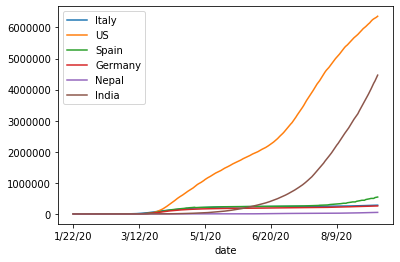

In [13]:
%matplotlib inline
df_plot.set_index('date').plot()

In [14]:
df_plot

,date,Italy,US,Spain,Germany,Nepal,India
0,1/22/20,0,1,0,0,0,0
1,1/23/20,0,1,0,0,0,0
2,1/24/20,0,2,0,0,0,0
3,1/25/20,0,2,0,0,1,0
4,1/26/20,0,5,0,0,1,0
5,1/27/20,0,5,0,1,1,0
6,1/28/20,0,5,0,4,1,0
7,1/29/20,0,5,0,4,1,0
8,1/30/20,0,5,0,4,1,1
9,1/31/20,2,7,0,5,1,1


In [15]:
from datetime import datetime

In [16]:
df_plot.date[0]

'1/22/20'

In [17]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [18]:
time_idx=[datetime.strptime(each,"%m/%d/%y") for each in df_plot.date]

In [19]:
time_str=[each.strftime("%Y-%m-%d") for each in time_idx]

In [20]:
df_plot["date"]=time_idx

In [21]:
type(df_plot["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
df_plot.head()

,date,Italy,US,Spain,Germany,Nepal,India
0,2020-01-22,0,1,0,0,0,0
1,2020-01-23,0,1,0,0,0,0
2,2020-01-24,0,2,0,0,0,0
3,2020-01-25,0,2,0,0,1,0
4,2020-01-26,0,5,0,0,1,0


In [23]:
df_plot.to_csv("../data/processed/COVID_small_flat_table.csv", sep=";")

## Relational data model

In [24]:
# data_path="../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

In [25]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [26]:
len(pd_raw)

266

In [27]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country', 'Province/State':'state'})
pd_data_base.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [28]:
pd_data_base['state']=pd_data_base['state'].fillna('no') 

In [29]:
pd_data_base=pd_data_base.drop(["Lat","Long"],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,no,Albania,0,0,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,no,Algeria,0,0,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,no,Andorra,0,0,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,no,Angola,0,0,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [30]:
pd_data_base.set_index(['state','country']).head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
state country                                                             
no    Afghanistan        0        0        0        0        0        0   
      Albania            0        0        0        0        0        0   
      Algeria            0        0        0        0        0        0   
      Andorra            0        0        0        0        0        0   
      Angola             0        0        0        0        0        0   

                   1/28/20  1/29/20  1/30/20  1/31/20  ...  8/31/20  9/1/20  \
state country                                          ...                    
no    Afghanistan        0        0        0        0  ...    38165   38196   
      Albania            0        0        0        0  ...     9513    9606   
      Algeria            0        0        0        0  ...    44494   44833   
      Andorra            0        0        0        0  ...     1176    1184   
      Angola             0        0        0        0  ...     2654    2729   

                   9/2/20  9/3/20  9/4/20  9/5/20  9/6/20  9/7/20  9/8/20  \
state country                                                               
no    Afghanistan   38243   38288   38304   38324   38398   38494   38520   
      Albania        9728    9844    9967   10102   10255   10406   10553   
      Algeria       45158   45469   45773   46071   46364   46653   46938   
      Andorra        1199    1199    1215    1215    1215    1261    1261   
      Angola         2777    2805    2876    2935    2965    2981    3033   

                   9/9/20  
state country              
no    Afghanistan   38544  
      Albania       10704  
      Algeria       47216  
      Andorra        1301  
      Angola         3092  

[5 rows x 232 columns]

In [31]:
pd_data_base.set_index(['state','country']).T.head()

state            no                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   

state                     Australian Capital Territory New South Wales  ...  \
country Argentina Armenia                    Australia       Australia  ...   
1/22/20         0       0                            0               0  ...   
1/23/20         0       0                            0               0  ...   
1/24/20         0       0                            0               0  ...   
1/25/20         0       0                            0               0  ...   
1/26/20         0       0                            0               3  ...   

state               no                                       \
country United Kingdom Uruguay Uzbekistan Venezuela Vietnam   
1/22/20              0       0          0         0       0   
1/23/20              0       0          0         0       2   
1/24/20              0       0          0         0       2   
1/25/20              0       0          0         0       2   
1/26/20              0       0          0         0       2   

state                                                            
country West Bank and Gaza Western Sahara Yemen Zambia Zimbabwe  
1/22/20                  0              0     0      0        0  
1/23/20                  0              0     0      0        0  
1/24/20                  0              0     0      0        0  
1/25/20                  0              0     0      0        0  
1/26/20                  0              0     0      0        0  

[5 rows x 266 columns]

In [32]:
pd_data_base.set_index(['state','country']).T.stack(level=[0,1]).head()

         state                         country       
1/22/20  Alberta                       Canada            0.0
         Anguilla                      United Kingdom    0.0
         Anhui                         China             1.0
         Aruba                         Netherlands       0.0
         Australian Capital Territory  Australia         0.0
dtype: float64

In [33]:
pd_data_base.set_index(['state','country']).T.stack(level=[0,1]).reset_index().head()

,level_0,state,country,0
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [34]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [35]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [36]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

         date state country  confirmed
60634  9/5/20    no      US    6244970
60900  9/6/20    no      US    6276365
61166  9/7/20    no      US    6300622
61432  9/8/20    no      US    6327009
61698  9/9/20    no      US    6361265


## using only country for the model

In [37]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [38]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country', 'Province/State':'state'})
pd_data_base.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [39]:
pd_data_base['state']=pd_data_base['state'].fillna('no') 

pd_data_base=pd_data_base.drop(["Lat","Long"],axis=1)
pd_data_base.head()


,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,no,Albania,0,0,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,no,Algeria,0,0,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,no,Andorra,0,0,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,no,Angola,0,0,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [40]:
len(pd_data_base)

266

In [41]:

pd_data_base_country=pd_data_base.groupby('country').agg(np.sum)
pd_data_base_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
Albania,0,0,0,0,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
Algeria,0,0,0,0,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
Andorra,0,0,0,0,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
Angola,0,0,0,0,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [42]:
len(pd_data_base_country)

188

In [43]:
pd_data_base_country.columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/31/20', '9/1/20', '9/2/20', '9/3/20', '9/4/20', '9/5/20', '9/6/20',
       '9/7/20', '9/8/20', '9/9/20'],
      dtype='object', length=232)

In [44]:
pd_data_base_country.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=188)

In [45]:
pd_data_base_country.T

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,2,0,0,0,0,0
1/28/20,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,2,0,0,0,0,0
1/29/20,0,0,0,0,0,0,0,0,6,0,...,0,0,0,0,2,0,0,0,0,0
1/30/20,0,0,0,0,0,0,0,0,9,0,...,0,0,0,0,2,0,0,0,0,0
1/31/20,0,0,0,0,0,0,0,0,9,0,...,2,0,0,0,2,0,0,0,0,0


In [46]:
pd_data_base_country.T.stack(level=[0]).head()

         country    
1/22/20  Afghanistan    0
         Albania        0
         Algeria        0
         Andorra        0
         Angola         0
dtype: int64

In [47]:
pd_data_base_country.T.stack(level=[0])

         country           
1/22/20  Afghanistan               0
         Albania                   0
         Algeria                   0
         Andorra                   0
         Angola                    0
                               ...  
9/9/20   West Bank and Gaza    27919
         Western Sahara           10
         Yemen                  1999
         Zambia                13112
         Zimbabwe               7429
Length: 43616, dtype: int64

In [48]:
pd_data_base_country.T.stack(level=[0]).reset_index()

,level_0,country,0
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0
...,...,...,...
43611,9/9/20,West Bank and Gaza,27919
43612,9/9/20,Western Sahara,10
43613,9/9/20,Yemen,1999
43614,9/9/20,Zambia,13112


In [49]:
pd_data_base_country.T.stack(level=[0]).reset_index().rename(columns={'level_0':'date',0:'confirmed'})

,date,country,confirmed
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0
...,...,...,...
43611,9/9/20,West Bank and Gaza,27919
43612,9/9/20,Western Sahara,10
43613,9/9/20,Yemen,1999
43614,9/9/20,Zambia,13112


In [50]:
full_database_country=pd_data_base_country.T.stack(level=[0]).reset_index().rename(columns={'level_0':'date',0:'confirmed'})

In [51]:
full_database_country.head()

,date,country,confirmed
0,1/22/20,Afghanistan,0
1,1/22/20,Albania,0
2,1/22/20,Algeria,0
3,1/22/20,Andorra,0
4,1/22/20,Angola,0


In [52]:
full_database_country.dtypes

date         object
country      object
confirmed     int64
dtype: object

In [53]:
full_database_country.confirmed=full_database_country.confirmed.astype(int)

full_database_country.to_csv('../data/processed/COVID_relational_database_by_country_confirmed.csv',sep=';',index=False)

### verifying the implementation group by country 
comparing the results from index=[state,country] and index=[country] 

implementation of groupby country in order to avoid averaging the data of all states of the country 

In [54]:
print(full_database_country[full_database_country['country']=='US'].tail())

         date country  confirmed
42850  9/5/20      US    6244970
43038  9/6/20      US    6276365
43226  9/7/20      US    6300622
43414  9/8/20      US    6327009
43602  9/9/20      US    6361265


In [55]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

         date state country  confirmed
60634  9/5/20    no      US    6244970
60900  9/6/20    no      US    6276365
61166  9/7/20    no      US    6300622
61432  9/8/20    no      US    6327009
61698  9/9/20    no      US    6361265


In [56]:
countries_list=full_database_country['country'].unique().tolist()

In [57]:
len(countries_list)

188

In [58]:
time_idx=full_database_country.date.unique()

In [59]:
# time_idx=full_database_country.date.unique()
full_db_country_plot = pd.DataFrame({
    'date':time_idx})
full_db_country_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [60]:
full_database_country[full_database_country["country"]=="Nepal"]["confirmed"]

121          0
309          0
497          0
685          1
873          1
1061         1
1249         1
1437         1
1625         1
1813         1
2001         1
2189         1
2377         1
2565         1
2753         1
2941         1
3129         1
3317         1
3505         1
3693         1
3881         1
4069         1
4257         1
4445         1
4633         1
4821         1
5009         1
5197         1
5385         1
5573         1
5761         1
5949         1
6137         1
6325         1
6513         1
6701         1
6889         1
7077         1
7265         1
7453         1
7641         1
7829         1
8017         1
8205         1
8393         1
8581         1
8769         1
8957         1
9145         1
9333         1
9521         1
9709         1
9897         1
10085        1
10273        1
10461        1
10649        1
10837        1
11025        1
11213        1
11401        1
11589        2
11777        2
11965        3
12153        3
12341        4
12529     

In [61]:
for each in countries_list[:5]:
    full_db_country_plot[each]=np.array(full_database_country[full_database_country["country"]==each]["confirmed"])

In [68]:
full_db_country_plot.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola
0,1/22/20,0,0,0,0,0
1,1/23/20,0,0,0,0,0
2,1/24/20,0,0,0,0,0
3,1/25/20,0,0,0,0,0
4,1/26/20,0,0,0,0,0


In [64]:
time_idx=full_database_country.date.unique()
full_db_state_country_plot = pd.DataFrame({
    'date':time_idx})
full_db_state_country_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [65]:
for each in countries_list[:5]:
    full_db_state_country_plot[each]=np.array(pd_relational_model[pd_relational_model["country"]==each]["confirmed"])

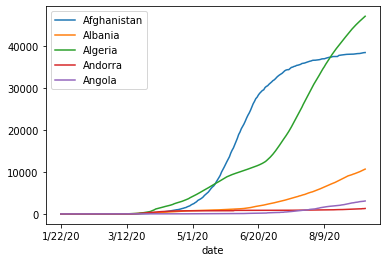

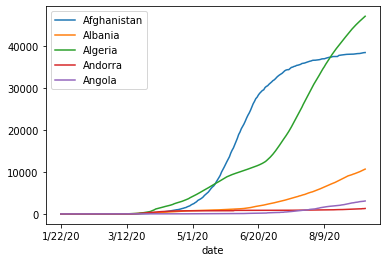

In [69]:
full_db_country_plot.set_index('date').plot()
full_db_state_country_plot.set_index('date').plot()